# IS 784 Google Colab and Pytorch Basics

Pytorch is a Python deep learning library from Facebook mainly written with CUDA, which is a general purpose GPU computing framework of NVIDIA. Its low level design is intended to be similar with Numpy and to follow Python principles as much as possible. It facilitates deep learning applications with its CUDA backend, automatic differentiation mechanism on computational graphs and its utilities for machine learning and deep learning.

In [ ]:
import torch
print(torch.__version__) #version of the pytorh

1.10.0+cu111


### Part 1 Basics


With Pytorch, you can create tensors in the way that you create arrays in Numpy. `torch.Tensor` is the main data structure of Pytorch. It holds the necesarry information for computation of created computational graphs in both forward and backward mode. Each tensor is an edge in computation

In [ ]:
# basic data operations 
x1 = torch.zeros(5, 3) #you can initilize tensors with zeros, ones or rand methods
print(x1)
print(x1.dtype)
print(x1.shape)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32
torch.Size([5, 3])


In [ ]:
x2 = torch.ones(5, 3) * 2.5  #example of ones method
print(x2)

tensor([[2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000]])


In [ ]:
x3 = torch.rand(5, 3)  # example of rand method
print(x3)

tensor([[0.5970, 0.5432, 0.7493],
        [0.1905, 0.6017, 0.7007],
        [0.6418, 0.4654, 0.0508],
        [0.4970, 0.7959, 0.2184],
        [0.7858, 0.7914, 0.7779]])


 Also, you can apply mathematical operations on tensors just as other scientific computing libraries

In [ ]:
print(x2 + x3)

tensor([[3.0970, 3.0432, 3.2493],
        [2.6905, 3.1017, 3.2007],
        [3.1418, 2.9654, 2.5508],
        [2.9970, 3.2959, 2.7184],
        [3.2858, 3.2914, 3.2779]])


In [ ]:
print(x3.T)  #transpose operation

tensor([[0.5970, 0.1905, 0.6418, 0.4970, 0.7858],
        [0.5432, 0.6017, 0.4654, 0.7959, 0.7914],
        [0.7493, 0.7007, 0.0508, 0.2184, 0.7779]])


In [ ]:
print(x2.shape)    #shape method of the Tensor return dimentions of the tensor
print(x3.T.shape)

torch.Size([5, 3])
torch.Size([3, 5])


In [ ]:
print(x2 @ x3.T) # @ is matrix multiplication operator. You can use .matmul() method as well.

tensor([[4.7238, 3.7323, 2.8950, 3.7784, 5.8875],
        [4.7238, 3.7323, 2.8950, 3.7784, 5.8875],
        [4.7238, 3.7323, 2.8950, 3.7784, 5.8875],
        [4.7238, 3.7323, 2.8950, 3.7784, 5.8875],
        [4.7238, 3.7323, 2.8950, 3.7784, 5.8875]])


## Part 2 Gradient and Tensor


Pytorch's autograd module lets you take derivatives of the leaf nodes in computational graphs by calling `.backward()` method of the scalar tensor to be differentiated. In this example, derivative of `x` with respect to `out = mean(x + y)` is computed by autograd. Note that differentiation by a matrix (or tensor) is nothing but differentiating by all elements in the matrix.

By default, Pytorch does not keep gradients of newly created tensors, unless you specify it when creating a tensor.


In [ ]:
x = torch.ones(2, 3, requires_grad=True)
y = torch.ones(2, 3, requires_grad=True) * 0.5
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


Pytorch also keeps track of the operations that create tensors to apply chain rule at backward propagation. For example, y is created by a multiplication while x is not.

In [ ]:
print(y)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]], grad_fn=<MulBackward0>)


In [ ]:
z = x + y
print(z)

tensor([[1.5000, 1.5000, 1.5000],
        [1.5000, 1.5000, 1.5000]], grad_fn=<AddBackward0>)


In [ ]:
out_scalar = z.mean()
print(out_scalar)

tensor(1.5000, grad_fn=<MeanBackward0>)


When you call `.backward()` of a 'scalar valued' tensor, autograd module automatically populates the `.grad` fields of the other tensors in computational graph. 

In [ ]:
out_scalar.backward()
print(x.grad)

tensor([[0.1667, 0.1667, 0.1667],
        [0.1667, 0.1667, 0.1667]])


Following example taken from Lecture 3 Reading 1. In this example following graph  a simple calculation c*(a+2b) is calculated. First lets calculate our forward pass

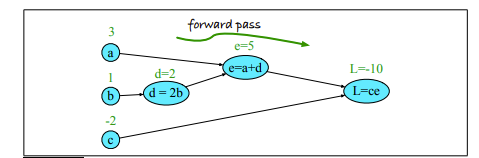

In [ ]:
a = torch.tensor([3],requires_grad=True,dtype=float)
b = torch.tensor([1],requires_grad=True,dtype=float)
c = torch.tensor([-2.0],requires_grad=True,dtype=float)
print(f'a: {a} \nb: {b} \nc: {c}')

a: tensor([3.], dtype=torch.float64, requires_grad=True) 
b: tensor([1.], dtype=torch.float64, requires_grad=True) 
c: tensor([-2.], dtype=torch.float64, requires_grad=True)


In [ ]:
d = 2*b
d.retain_grad() # With this parameter we can keep gradients on non leaf nodes.
print("d: ",d)
e = a+d
e.retain_grad()
print("e: ",e)
L = c*e
L.retain_grad()
print("L: ",L)

d:  tensor([2.], dtype=torch.float64, grad_fn=<MulBackward0>)
e:  tensor([5.], dtype=torch.float64, grad_fn=<AddBackward0>)
L:  tensor([-10.], dtype=torch.float64, grad_fn=<MulBackward0>)


Lets run `.backwards` and see the result of our gradients

In [ ]:
L.backward()

In [ ]:
print("gradient of e: ",e.grad) # Gradient of L with respect to e :  ∇(L)/∇(e) = c = -2
print("gradient of d: ",d.grad) #Gradient of L with respect to d  :  ∇(L)/∇(e)  * ∇(e)/∇(d) = -2* 1 =-2
print("gradient of c: ",c.grad) #Gradient of L with respect to c :  ∇(L)/∇(c) = e = 5
print("gradient of b: ",b.grad)  #Gradient of L with respect to d  :  ∇(L)/∇(e)  * ∇(e)/∇(d)  * ∇(d)/∇(b) = -2* 1 * 2 = -4
print("gradient of a: ",a.grad)  #Gradient of L with respect to d  :  ∇(L)/∇(e)  * ∇(e)/∇(a) = -2* 1 = -2

gradient of e:  tensor([-2.], dtype=torch.float64)
gradient of d:  tensor([-2.], dtype=torch.float64)
gradient of c:  tensor([5.], dtype=torch.float64)
gradient of b:  tensor([-4.], dtype=torch.float64)
gradient of a:  tensor([-2.], dtype=torch.float64)


## Part 3 GPU and CUDA support

Pytorch supports CUDA backend for accelerating parallelizable operations such as matrix multiplication and convolution in GPU. In Colab, Pytorch is installed with CUDA support. You can check if cuda is avaliable in current session by calling `torch.cuda.is_avaliable()` method. If it returns `False`, you can enable it by choosing GPU in menu `Runtime -> Change runtime type -> Hardware Accelerator` and restarting the runtime.

In [ ]:
import torch
from time import time

print(torch.cuda.is_available())

True


You can also check the GPU state with `nvidia-smi` in shell. You can invoke shell command with prefix `!` in the notebook.

In [ ]:
!nvidia-smi

Fri Mar  4 00:35:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    27W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

You can send tensors in GPU memory by calling `.cuda()` methods from tensors. If you run an operations on tensors in the GPU memory, it will automatically be calculated in GPU so that you don't need to use CUDA for most operations. 

Here is a benchmark for multiplication of large matrices in CPU and GPU. 

In [ ]:
x = torch.rand(500, 700)
y = torch.rand(700, 900)

start = time() 

for n in range(5000):# depending on the systems cpu this process may take some time
    x.matmul(y)
    
end = time()

cpu_time = end - start
print(f'{cpu_time:.2f} seconds')

47.23 seconds


In [ ]:
x = torch.rand(500, 700).cuda()
y = torch.rand(700, 900).cuda()

start = time()

for n in range(5000):
    x.matmul(y)
    
end = time()

gpu_time = end - start
print(f'{gpu_time:.2f} seconds')

1.60 seconds


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   43G   37G  54% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  817M  59% /sbin/docker-init
/dev/sda1        86G   47G   40G  55% /opt/bin/.nvidia
tmpfs           6.4G   36K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


GPU had significant advantage here. Actually, this is not even a very significant difference when compared with how it speeds up deep neural networks.

##Part 4 Data Utilities

In addition to the scientific computing features of Pytorch, it has utilities for common operations in machine learning. These include dataset operations like sampling, shuffling, batching of data or loading of commonly used datasets. Some of these features are provided with `torchtext` library, which is a NLP specialized library which is officially supported by Pytorch team.  In this examplee, IMDB dataset is loaded using `torchtext.datasets`.

In [ ]:
import torch, torchtext
torchtext.__version__

'0.11.0'

Before we continue this part of the tutorial torchtext was updated to 0.9 version at 4 March  2021 alongside with PyTorch 1.8  update. This update changed how to process  the input data with torchtext fundamentally. Older version moved to `torchtext.legacy` branch. 

Why are we mentioning this? It is because many of the resources and tutorial on the internet created by older versions of the torchtext and Google Colab updated torchtext to latest version. In this part of the tutorial we will explain both versions of the torchtext.

### Torchtext.legacy

Main concepts of TorchText.legacy is the `Field`. This parameter defines how the data should be processed.

In [ ]:
# set up fields
TEXT = torchtext.legacy.data.Field(tokenize='spacy', batch_first=True) 
LABEL = torchtext.legacy.data.LabelField(sequential=False)

Another  important module of `torchtext.legacy` is `datasets` which contains common datasets used in NLP.   
In this example we will load IMDB dataset using this module and  we will split into dataset in to train and test sets with help of its `split`  function .
Torchtext will automatically download the dataset from its repository if it is not cached. 


In [ ]:
# make splits for data
train, test = torchtext.legacy.datasets.IMDB.splits(TEXT, LABEL)

print("train length is: ",len(train))
print("test length is: ",len(test))
print(vars(train[0]))

downloading aclImdb_v1.tar.gz


100%|██████████| 84.1M/84.1M [00:02<00:00, 31.0MB/s]


train length is:  25000
test length is:  25000
{'text': ['Almost', 'the', 'entire', 'film', 'takes', 'place', 'in', 'a', 'public', 'bathhouse', 'in', 'China', '.', 'There', 'are', 'no', 'fancy', 'sets', ',', 'explosion', 'or', 'glamorous', 'people', '--', 'only', 'fine', 'writing', ',', 'acting', 'and', 'direction', '(', 'Hollywood', ',', 'take', 'note!).<br', '/><br', '/>An', 'estranged', 'son', 'returns', 'home', 'when', 'he', 'believes', 'his', 'father', 'is', 'dying', '.', 'He', 'is', 'surprised', 'to', 'see', 'that', 'Dad', 'looks', 'fine', 'and', 'is', 'going', 'about', 'running', 'the', 'family', 'business', 'as', 'usual', '.', 'In', 'fact', ',', 'he', 'notices', 'that', 'his', 'father', 'and', 'his', 'retarded', 'brother', 'have', 'really', 'forged', 'a', 'close', 'and', 'caring', 'relationship', 'and', 'it', 'soon', 'becomes', 'obvious', 'that', 'he', 'is', 'out', 'of', 'the', 'loop', '!', 'Dad', 'is', 'very', 'traditional', 'and', 'this', 'visiting', 'son', 'is', 'from', 'the

Next task we need to do is  creating vocabulary.  Vocabulary is an important part of the process due to it will convert our string data to integers.  There are  two  main methods we can employ, which are character-level and word-level language models. Character level  models provide easy computation due to limit of characters. On the other hand Word level models are better at capturing semantic meanings.  



In [ ]:
# build the vocabulary
TEXT.build_vocab(train)
LABEL.build_vocab(train)

print("Unique tokens in TEXT vocabulary:",len(TEXT.vocab))
print("Unique tokens in LABEL vocabulary:",len(LABEL.vocab))
print(TEXT.vocab.freqs.most_common(20))
print(LABEL.vocab.freqs)
print(TEXT.unk_token)
print(TEXT.pad_token)

Unique tokens in TEXT vocabulary: 121417
Unique tokens in LABEL vocabulary: 2
[('the', 289838), (',', 275296), ('.', 236843), ('and', 156483), ('a', 156282), ('of', 144055), ('to', 133886), ('is', 109095), ('in', 87676), ('I', 77546), ('it', 76545), ('that', 70355), ('"', 63329), ("'s", 61928), ('this', 60483), ('-', 52863), ('/><br', 50935), ('was', 50013), ('as', 43508), ('with', 42807)]
Counter({'pos': 12500, 'neg': 12500})
<unk>
<pad>


Following code utilizes `torch.device` module. Using this parameter we can send our tensors to GPU if it is available. 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Last part of the preparing data is creating batches.
We will use `BuketIterator.splits` method to create train and test iterators. This function also works similar to `torch.utils.datadataloader`.  Different form ` dataloader`, `BuketIterator` pads the inputs according to maximum length corpus in the batch. In addition it tries to batch similar length examples to minimize the amount of padding. 



In [ ]:
# make iterator for splits
train_iter, test_iter = torchtext.legacy.data.BucketIterator.splits(
    (train, test), batch_size=1, device=device)

### Torchtext v0.10

In the newer version of the Torchtext data processing pipeline is changed. These changes explained in detail at [migration tutorial](https://colab.research.google.com/github/pytorch/text/blob/master/examples/legacy_tutorial/migration_tutorial.ipynb) given at [torchtext project page](https://pypi.org/project/torchtext/) 

Following code examples taken from migration tutorial.They show how to process data and create iterators using new version.

One of the changes is removal of the `Field`. Because of this Datasets returns train and test data without preprocessing.


In [ ]:
from torchtext.datasets import IMDB
train_iter, test_iter = IMDB(split=('train', 'test'))

100%|██████████| 84.1M/84.1M [00:02<00:00, 31.8MB/s]


Data processing can be done using `torchtext.data.utils.get_tokenizer` function. Also instead of using `Field.build_vocab` function, `torchtext.vocab.Vocab` function can be used.

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('spacy')

In [ ]:
# from collections import Counter
# from torchtext.vocab import Vocab

# train_iter = IMDB(split='train')
# counter = Counter()
# for (label, line) in train_iter:
#     counter.update(tokenizer(line))
# vocab = Vocab(counter, min_freq=10, specials=('<unk>', '<PAD>'))
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
train_iter = IMDB(split='train')

def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
print("Unique tokens in TEXT vocabulary:",len(vocab))
# print(vocab.freqs.most_common(5))
#print(vocab.get_parameter.freqs.most_common(5))

Unique tokens in TEXT vocabulary: 100683


Text transformation can be done by simple lambda function.

In [ ]:
text_transform = lambda x:  [vocab[token] for token in tokenizer(x)]
label_transform = lambda x: 1 if x == 'pos' else 0

# Print out the output of text_transform
print("input to the text_transform:", "here is an example")
print("output of the text_transform:", text_transform("here is an example"))

input to the text_transform: here is an example
output of the text_transform: [131, 9, 40, 464]


At last version of the torchtext `BucketIterator` is removed. Instead it is suggested that `DataLoader`  function of  pytorch to be used.

In [ ]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
   label_list, text_list = [], []
   for (_label, _text) in batch:
        label_list.append(label_transform(_label))
        processed_text = torch.tensor(text_transform(_text))
        text_list.append(processed_text)
   return torch.tensor(label_list), pad_sequence(text_list, padding_value=3.0)

train_iter = IMDB(split='train')
train_dataloader = DataLoader(list(train_iter), batch_size=8, shuffle=True, 
                              collate_fn=collate_batch)

In [ ]:
# for idx, (label, text) in enumerate(train_dataloader):
#   model(item)

# Or
next(iter(train_dataloader))

(tensor([1, 1, 1, 1, 0, 0, 1, 1]),
 tensor([[  12,  366, 1884,  ...,  261,  874,   12],
         [  74,    7,    8,  ...,  298, 5060,  558],
         [  64, 2661,   15,  ...,   13,  398,  267],
         ...,
         [   3,    3,    3,  ...,  133,    3,    3],
         [   3,    3,    3,  ..., 1513,    3,    3],
         [   3,    3,    3,  ...,    2,    3,    3]]))

##Part 5 Optimization

Since most deep neural networks are trained with a Stochastic Gradient Descent (SGD) variant, Pytorch also has a module that provides most deep learning optimizers, and utilities like learning rate schedulers.


In [ ]:
x = torch.tensor(100.0, requires_grad=True)

In [ ]:
y = torch.tensor(100.0, requires_grad=True)

In [ ]:
optimizer = torch.optim.SGD(params=[x, y],
                            lr=0.01)

Before proceeding, I suggest you to find values of `x` and `y` to minimize `my_function(x, y)`

In [ ]:
def my_function(x, y):
    return torch.square(x) + torch.square(y)

You can create optimizers by initializing the classes in `torch.optim` module with the parameters (needs to be an iterable like a list) to be optimized, and optimizer speceific hyperparameters such as learning rate and momentum.
Actually optimizers does not know anything about the optimized quantity. It can only access (and reset) the gradient fields (`.grad`) of the tensors in its `params=` argument.

The `grad` field of tensors is populated by `.backward()` method of to-be-minimized tensor.

In this example `x` and `y` is optimized to minimize `z` tensor. So `.backward()` needs is called from `z`. 

In [ ]:
#This optimizer is going to optimize x and y
optimizer = torch.optim.SGD(params=[x, y],
                            lr=0.01)


Now, try to run the cell below multiple times to see how SGD optimizer minimizes z by subtracting the gradients of x and y from themselves after multiplying gradients by the learning rate (lr).

You can run cells before proceeding to the next cell by Ctrl+Enter

In [ ]:
#calculate x^2 + y^2
z = my_function(x, y)

print(f'x before step is: {x.item()}')
print(f'y before step is: {y.item()}')
#calculate gradients of x and y wrt. z
optimizer.zero_grad()
z.backward()

print(f'gradient of x is: {x.grad.item()}')
print(f'gradient of y is: {y.grad.item()}')

#take a gradient descent step
optimizer.step()

print(f'x^2 + y^2 = {z}')

x before step is: 100.0
y before step is: 100.0
gradient of x is: 200.0
gradient of y is: 200.0
x^2 + y^2 = 20000.0


##Part 6 Creating Neural Network

To create neural networks with Pytorch, you need to create a Class that inherits `torch.nn.Module`. Then, you need to define the layers in the `__init__` method and define the forward propagation logic in `forward` method. This class can be considered as a blueprint of the network. It specifies the shapes of its parameters, but does not initialize the parameters. The example below shows a 3 layer network with input size 30 and layer sizes [20, 15, 1], respectively. Most common layers are provided by `torch.nn` module.

In [ ]:
import torch.nn.functional as F

In [ ]:
class DumbNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(30, 20)
        self.layer2 = torch.nn.Linear(20, 15)
        self.layer3 = torch.nn.Linear(15, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        return x
        
        

In [ ]:
input_data = torch.randn(16, 30) #dummy input to match the network's input shape

In [ ]:
print(input_data.shape)

torch.Size([16, 30])


To initialize and instantiate a network from the blueprint, you can just use the class initialization syntax of Python, which is shown below.
Note that if the `__init__` method takes arguments other than `self`, then you need to initialize the network with these arguments.

In [ ]:
network = DumbNetwork()

In [ ]:
print(network)

DumbNetwork(
  (layer1): Linear(in_features=30, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=15, bias=True)
  (layer3): Linear(in_features=15, out_features=1, bias=True)
)


When the network is called via function call operator `()`, `forward` method of the network is called actually. Note that network handles inputs as batches and the batch dimension can be arbitrary.

In [ ]:
output = network(input_data)

In [ ]:
print(output.shape)

torch.Size([16, 1])


## Part 7 Other useful libraries  

In natural language processing (NLP) domain, there are many useful libraries which provide preprocessing tools or complex pretrained models.In this part of the tutorial, we will talk about these libraries that we will be using during this semester. 

[`Gensim`](https://radimrehurek.com/gensim/index.html) is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.It provides many useful tools to create and train word vectors.


In [ ]:
import gensim 
gensim.__version__ ## There is a 4.0 version available. Google Colab contains 3.6 version.

'3.6.0'

[Natural Language Toolkit or NLTK]( https://www.nltk.org/) is an another library that is frequently used in language processing domain. This library contains many useful tools for tokenization, stemming, lemmatization and more. In the next tutorial we will create an NLP model using this library.

[SpaCy]( https://spacy.io/) is another library  which provides similar utilities as NLTK. While NLTK focuses on research and teaching, spaCy is more focuses on  products and more refined pipelines.

In [ ]:
import nltk
import spacy
print(nltk.__version__)  #There is a 3.5 version available. Google Colab contains 3.2.5 version.
print(spacy.__version__) # There is a 3.0 version available. Google Colab contains 2.2.4 version.

3.2.5
2.2.4


And finally [huggingface]( https://huggingface.co/) libraries. These libraries provide the state of the art NLP models. Its [`transformers`]( https://huggingface.co/transformers/index.html)  library provides easy access to popular models like `BERT` and `GPT-2`. Because Colab does not contain this library, you need to install it first if you want to work on Colab.

Please note that using newest versions of a library is not always necessary. Although newer versions can provide more functions and bugfixes, it can create dependency problems with other libraries in your system.


In [ ]:
!pip install transformers
import transformers
transformers.__version__

     |████████████████████████████████| 3.8 MB 5.1 MB/s 
     |████████████████████████████████| 6.5 MB 513 kB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 38.8 MB/s 
     |████████████████████████████████| 895 kB 42.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


'4.17.0'

## Part 5 Recommended References
* For more information about tensors, you can refer to [pytorch tensor tutorial](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html) or for more visual representations [tensorflow tensor tutorial](https://www.tensorflow.org/guide/tensor)

* For more information about pytorch and its, you can refer to [pytorch tutorial page](https://pytorch.org/tutorials/index.html)